In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
#Openweather

api_key = "88b84b71609812cfd55a6bdca8cc9613"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=namatanai
Processing Record 2 of Set 1 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=guerrero%20negro
Processing Record 3 of Set 1 | palembang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=palembang
Processing Record 4 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=hilo
Processing Record 5 of Set 1 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=constitucion
Processing Record 6 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=cape%20town
Proces

Processing Record 3 of Set 2 | craig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=craig
Processing Record 4 of Set 2 | aybak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=aybak
City not found. Skipping...
Processing Record 5 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=thompson
Processing Record 6 of Set 2 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=barentsburg
City not found. Skipping...
Processing Record 7 of Set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=nikolskoye
Processing Record 8 of Set 2 | ejura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=ejura
Processing Record 9 of Set 2 | krasnouso

Processing Record 4 of Set 3 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=port%20hedland
Processing Record 5 of Set 3 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=coahuayana
Processing Record 6 of Set 3 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=port%20hardy
Processing Record 7 of Set 3 | vagur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=vagur
Processing Record 8 of Set 3 | bako
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=bako
Processing Record 9 of Set 3 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=punta%20arenas
Processing Record 10 of Set 3 | ostrovnoy
http://api.openweathermap.org/

Processing Record 7 of Set 4 | ninotsminda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=ninotsminda
Processing Record 8 of Set 4 | gonen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=gonen
Processing Record 9 of Set 4 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=comodoro%20rivadavia
Processing Record 10 of Set 4 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=sept-iles
Processing Record 11 of Set 4 | itupiranga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=itupiranga
Processing Record 12 of Set 4 | grand-santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=grand-santi
Processing Record 13 of Set 4 | faanui
http://api.o

Processing Record 9 of Set 5 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=asau
City not found. Skipping...
Processing Record 10 of Set 5 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=zhigansk
Processing Record 11 of Set 5 | itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=itaituba
Processing Record 12 of Set 5 | edson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=edson
Processing Record 13 of Set 5 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=nuuk
Processing Record 14 of Set 5 | lapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=lapa
Processing Record 15 of Set 5 | klaksvik
http://api.openweathermap.org/data/2.5/weath

Processing Record 11 of Set 6 | sandy springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=sandy%20springs
Processing Record 12 of Set 6 | sayansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=sayansk
Processing Record 13 of Set 6 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=waipawa
Processing Record 14 of Set 6 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=port%20lincoln
Processing Record 15 of Set 6 | luan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=luan
Processing Record 16 of Set 6 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=broken%20hill
Processing Record 17 of Set 6 | champasak
http://api.openweather

Processing Record 14 of Set 7 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=manokwari
Processing Record 15 of Set 7 | mattru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=mattru
Processing Record 16 of Set 7 | mezotur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=mezotur
Processing Record 17 of Set 7 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=brae
Processing Record 18 of Set 7 | toora-khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=toora-khem
Processing Record 19 of Set 7 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=yar-sale
Processing Record 20 of Set 7 | portland
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 18 of Set 8 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=muros
Processing Record 19 of Set 8 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=deputatskiy
Processing Record 20 of Set 8 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=saleaula
City not found. Skipping...
Processing Record 21 of Set 8 | esqueda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=esqueda
Processing Record 22 of Set 8 | aljezur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=aljezur
Processing Record 23 of Set 8 | matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=matagami
Processing Record 24 of Set 8 | leningradskiy
http://api.o

Processing Record 21 of Set 9 | arkhangelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=arkhangelsk
Processing Record 22 of Set 9 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=vanimo
Processing Record 23 of Set 9 | toba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=toba
Processing Record 24 of Set 9 | marquette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=marquette
Processing Record 25 of Set 9 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=leh
Processing Record 26 of Set 9 | alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=alekseyevsk
Processing Record 27 of Set 9 | hami
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 24 of Set 10 | elmvale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=elmvale
Processing Record 25 of Set 10 | kishtwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=kishtwar
Processing Record 26 of Set 10 | balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=balkanabat
Processing Record 27 of Set 10 | weiser
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=weiser
Processing Record 28 of Set 10 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=belaya%20gora
Processing Record 29 of Set 10 | karkaralinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=karkaralinsk
City not found. Skipping...
Processing Record 30 of Set 10 | g

Processing Record 26 of Set 11 | iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=iquitos
Processing Record 27 of Set 11 | bandar-e torkaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=bandar-e%20torkaman
City not found. Skipping...
Processing Record 28 of Set 11 | bismarck
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=bismarck
Processing Record 29 of Set 11 | entre rios
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=entre%20rios
Processing Record 30 of Set 11 | madera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=madera
Processing Record 31 of Set 11 | bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=bukama
Processing Record 32 of Set 11 |

Processing Record 29 of Set 12 | bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=bosaso
Processing Record 30 of Set 12 | lyuban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=lyuban
Processing Record 31 of Set 12 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=mount%20isa
Processing Record 32 of Set 12 | balsas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=balsas
Processing Record 33 of Set 12 | kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=kiunga
Processing Record 34 of Set 12 | zalantun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b84b71609812cfd55a6bdca8cc9613&q=zalantun
Processing Record 35 of Set 12 | casimiro de abreu
http://api.openweathermap.org/data/2.

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,namatanai,56,PG,1555048127,98,-3.66,152.44,83.11,9.44
1,guerrero negro,0,MX,1555048127,100,27.97,-114.04,55.30,8.10
2,palembang,40,ID,1555045200,74,-2.99,104.76,86.00,5.82
3,hilo,75,US,1555048108,83,19.71,-155.08,73.00,16.04
4,constitucion,0,MX,1555048128,37,23.99,-104.67,49.00,7.43


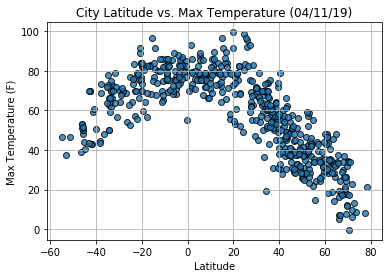

In [7]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

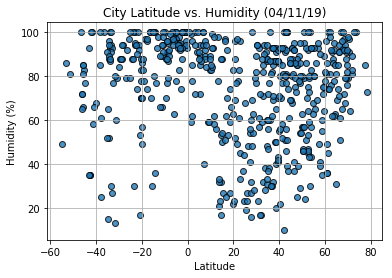

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

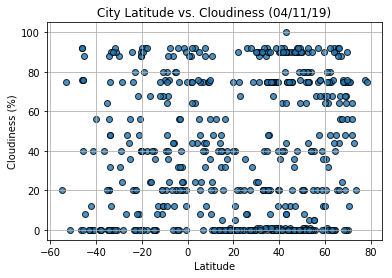

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

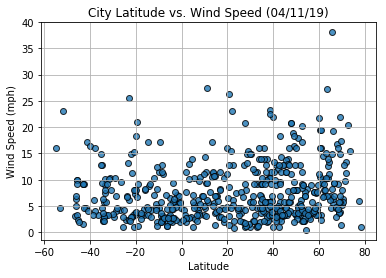

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()